# Low-Precision Machine Learning

## Task 1: Quantization of Input Data

In [56]:
from sklearn.datasets import load_iris
import torch
import torch.nn as nn
import torch.optim as optim
import time
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = load_iris()

In [19]:
target = df.target
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
data = df.data
data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [11]:
import numpy as np
def quantize_data(data, bits):
    levels = 2**bits
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    quantized_data = np.round(((data - min_val) / (max_val - min_val)) *
    (levels - 1)) * (max_val - min_val) / (levels - 1) + min_val
    return quantized_data

In [22]:
quant_2 = quantize_data(data,2)
print(quantize_data(data,2)[:5])

[[5.5 3.6 1.  0.1]
 [5.5 2.8 1.  0.1]
 [4.3 3.6 1.  0.1]
 [4.3 2.8 1.  0.1]
 [5.5 3.6 1.  0.1]]


In [23]:
quant_4 = quantize_data(data,4)
print(quantize_data(data,4)[:5])

[[5.02       3.44       1.39333333 0.26      ]
 [5.02       2.96       1.39333333 0.26      ]
 [4.78       3.28       1.39333333 0.26      ]
 [4.54       3.12       1.39333333 0.26      ]
 [5.02       3.6        1.39333333 0.26      ]]


In [24]:
quant_8 = quantize_data(data,8)
print(quantize_data(data,8)[:5])

[[5.10470588 3.49647059 1.39333333 0.20352941]
 [4.90705882 2.99764706 1.39333333 0.20352941]
 [4.69529412 3.20470588 1.30078431 0.20352941]
 [4.59647059 3.10117647 1.50901961 0.20352941]
 [5.00588235 3.6        1.39333333 0.20352941]]


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sd = StandardScaler()
scaled_quant_2 = sd.fit_transform(quant_2)
scaled_quant_4 = sd.fit_transform(quant_4)
scaled_quant_8 = sd.fit_transform(quant_8)

## Task 2: Training and Evaluation with Quantized Data (Cross-Validation)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [74]:
datasets = {'scaled_quant_2': scaled_quant_2, 'scaled_quant_4': scaled_quant_4, 'scaled_quant_8': scaled_quant_8}

In [88]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC()

kf = StratifiedKFold(n_splits=5)

accuracy_scores_knn = []
std_dev_knn = []

accuracy_scores_dt = []
std_dev_dt = []

accuracy_scores_svm = []
std_dev_svm = []
quant_levels = list(datasets.keys()) 

for name, dataset in datasets.items():
    X = dataset[:, :-1] 
    y = target        
    
    print(f"Cross-validation results for {name}:")

    cv_scores_knn = cross_val_score(knn, X, y, cv=kf)
    accuracy_scores_knn.append(cv_scores_knn.mean())
    std_dev_knn.append(cv_scores_knn.std())
    print(f"KNN Mean accuracy: {np.mean(cv_scores_knn):.4f}")
    print(f"KNN Standard deviation: {np.std(cv_scores_knn):.4f}")
    print()

    cv_scores_dt = cross_val_score(decision_tree, X, y, cv=kf)
    accuracy_scores_dt.append(cv_scores_dt.mean())
    std_dev_dt.append(cv_scores_dt.std())
    print(f"Decision Tree Mean accuracy: {np.mean(cv_scores_dt):.4f}")
    print(f"Decision Tree Standard deviation: {np.std(cv_scores_dt):.4f}")
    print()

    cv_scores_svm = cross_val_score(svm, X, y, cv=kf)
    accuracy_scores_svm.append(cv_scores_svm.mean())
    std_dev_svm.append(cv_scores_svm.std())
    print(f"SVM Mean accuracy: {np.mean(cv_scores_svm):.4f}")
    print(f"SVM Standard deviation: {np.std(cv_scores_svm):.4f}")
    print()
    
    print()

Cross-validation results for scaled_quant_2:
KNN Mean accuracy: 0.7200
KNN Standard deviation: 0.0748

Decision Tree Mean accuracy: 0.8333
Decision Tree Standard deviation: 0.0699

SVM Mean accuracy: 0.8333
SVM Standard deviation: 0.0699


Cross-validation results for scaled_quant_4:
KNN Mean accuracy: 0.8800
KNN Standard deviation: 0.0340

Decision Tree Mean accuracy: 0.9200
Decision Tree Standard deviation: 0.0452

SVM Mean accuracy: 0.8800
SVM Standard deviation: 0.0340


Cross-validation results for scaled_quant_8:
KNN Mean accuracy: 0.9000
KNN Standard deviation: 0.0471

Decision Tree Mean accuracy: 0.9467
Decision Tree Standard deviation: 0.0340

SVM Mean accuracy: 0.9067
SVM Standard deviation: 0.0573




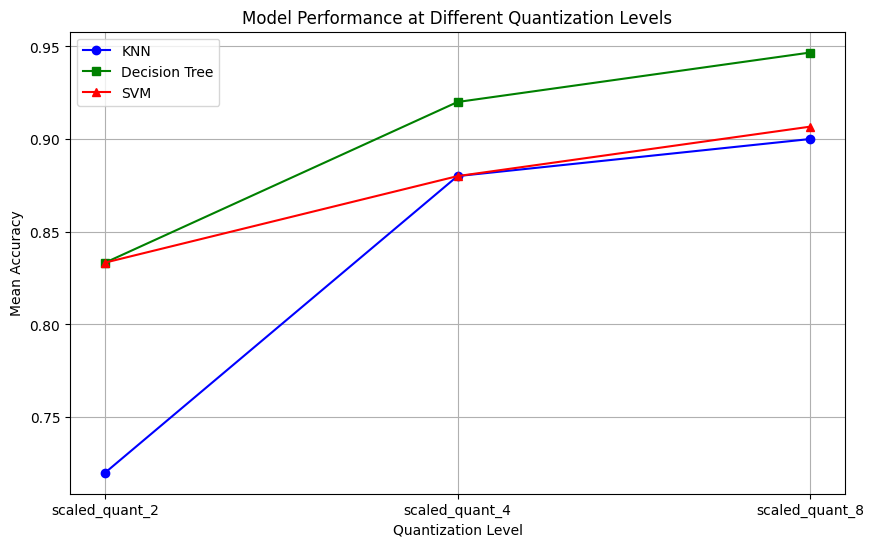

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(quant_levels, accuracy_scores_knn, marker='o', label='KNN', color='blue')

plt.plot(quant_levels, accuracy_scores_dt, marker='s', label='Decision Tree', color='green')

plt.plot(quant_levels, accuracy_scores_svm, marker='^', label='SVM', color='red')

plt.xlabel('Quantization Level')
plt.ylabel('Mean Accuracy')
plt.title('Model Performance at Different Quantization Levels')
plt.legend()

plt.grid(True)
plt.show()

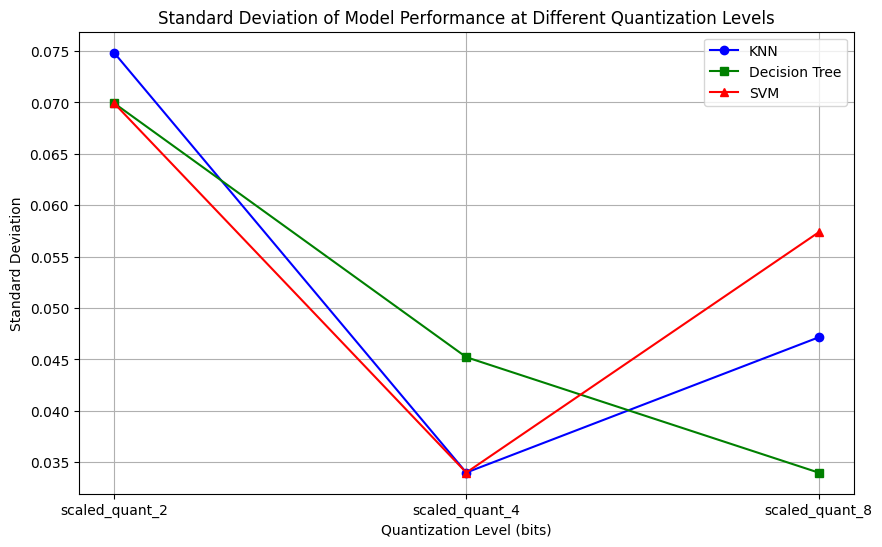

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(quant_levels, std_dev_knn, marker='o', label='KNN', color='blue')

plt.plot(quant_levels, std_dev_dt, marker='s', label='Decision Tree', color='green')

plt.plot(quant_levels, std_dev_svm, marker='^', label='SVM', color='red')

plt.xlabel('Quantization Level (bits)')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Model Performance at Different Quantization Levels')

plt.legend()

plt.grid(True)

plt.show()


## Task 3: Comparison with Full-Precision Models

In [90]:

full_precision_accuracy_knn = []
full_precision_std_knn = []
full_precision_accuracy_dt = []
full_precision_std_dt = []
full_precision_accuracy_svm = []
full_precision_std_svm = []

for name, dataset in datasets.items():
    X = dataset[:, :-1]
    y = target
    
    cv_scores_knn = cross_val_score(knn, X, y, cv=kf)
    full_precision_accuracy_knn.append(cv_scores_knn.mean())
    full_precision_std_knn.append(cv_scores_knn.std())
    
    cv_scores_dt = cross_val_score(decision_tree, X, y, cv=kf)
    full_precision_accuracy_dt.append(cv_scores_dt.mean())
    full_precision_std_dt.append(cv_scores_dt.std())
    
    cv_scores_svm = cross_val_score(svm, X, y, cv=kf)
    full_precision_accuracy_svm.append(cv_scores_svm.mean())
    full_precision_std_svm.append(cv_scores_svm.std())


print("Full-Precision Results:")
print(f"KNN - Mean Accuracy: {np.mean(full_precision_accuracy_knn):.4f}, Std Dev: {np.mean(full_precision_std_knn):.4f}")
print(f"Decision Tree - Mean Accuracy: {np.mean(full_precision_accuracy_dt):.4f}, Std Dev: {np.mean(full_precision_std_dt):.4f}")
print(f"SVM - Mean Accuracy: {np.mean(full_precision_accuracy_svm):.4f}, Std Dev: {np.mean(full_precision_std_svm):.4f}")


Full-Precision Results:
KNN - Mean Accuracy: 0.8333, Std Dev: 0.0520
Decision Tree - Mean Accuracy: 0.9000, Std Dev: 0.0497
SVM - Mean Accuracy: 0.8733, Std Dev: 0.0538


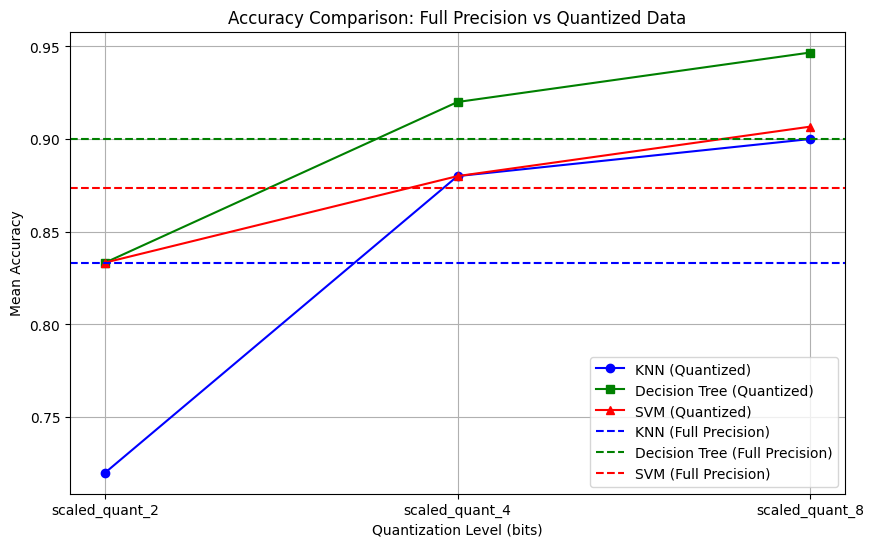

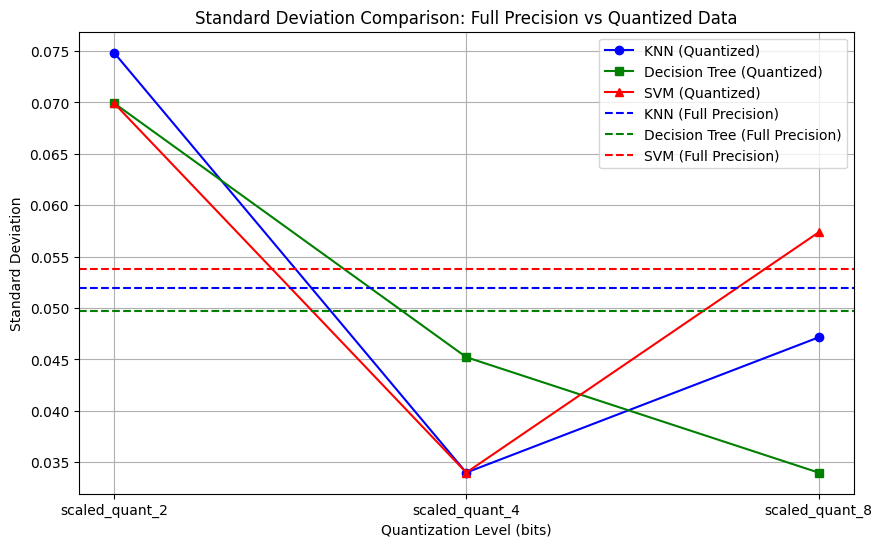

In [91]:

plt.figure(figsize=(10, 6))

plt.plot(quant_levels, accuracy_scores_knn, marker='o', label='KNN (Quantized)', color='blue')
plt.plot(quant_levels, accuracy_scores_dt, marker='s', label='Decision Tree (Quantized)', color='green')
plt.plot(quant_levels, accuracy_scores_svm, marker='^', label='SVM (Quantized)', color='red')

plt.axhline(y=np.mean(full_precision_accuracy_knn), color='blue', linestyle='--', label='KNN (Full Precision)')
plt.axhline(y=np.mean(full_precision_accuracy_dt), color='green', linestyle='--', label='Decision Tree (Full Precision)')
plt.axhline(y=np.mean(full_precision_accuracy_svm), color='red', linestyle='--', label='SVM (Full Precision)')

plt.xlabel('Quantization Level (bits)')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy Comparison: Full Precision vs Quantized Data')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))

plt.plot(quant_levels, std_dev_knn, marker='o', label='KNN (Quantized)', color='blue')
plt.plot(quant_levels, std_dev_dt, marker='s', label='Decision Tree (Quantized)', color='green')
plt.plot(quant_levels, std_dev_svm, marker='^', label='SVM (Quantized)', color='red')


plt.axhline(y=np.mean(full_precision_std_knn), color='blue', linestyle='--', label='KNN (Full Precision)')
plt.axhline(y=np.mean(full_precision_std_dt), color='green', linestyle='--', label='Decision Tree (Full Precision)')
plt.axhline(y=np.mean(full_precision_std_svm), color='red', linestyle='--', label='SVM (Full Precision)')

plt.xlabel('Quantization Level (bits)')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation Comparison: Full Precision vs Quantized Data')
plt.legend()
plt.grid(True)
plt.show()


## Task 4: Impact Analysis

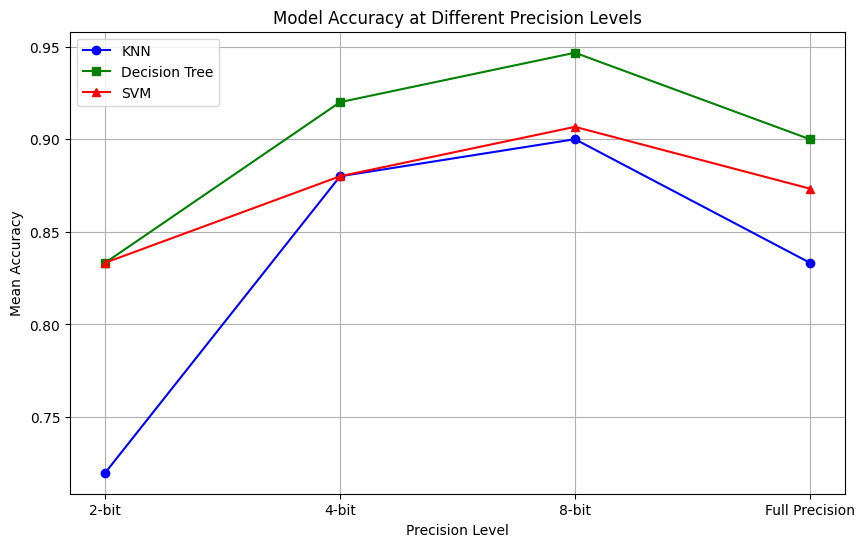

In [94]:
import matplotlib.pyplot as plt

quant_levels_full = [ '2-bit', '4-bit', '8-bit','Full Precision']

accuracy_knn_full =  accuracy_scores_knn + [np.mean(full_precision_accuracy_knn)] 
accuracy_dt_full = accuracy_scores_dt + [np.mean(full_precision_accuracy_dt)]
accuracy_svm_full = accuracy_scores_svm + [np.mean(full_precision_accuracy_svm)]

# Plot accuracy for each model
plt.figure(figsize=(10, 6))

plt.plot(quant_levels_full, accuracy_knn_full, marker='o', label='KNN', color='blue')
plt.plot(quant_levels_full, accuracy_dt_full, marker='s', label='Decision Tree', color='green')
plt.plot(quant_levels_full, accuracy_svm_full, marker='^', label='SVM', color='red')

plt.xlabel('Precision Level')
plt.ylabel('Mean Accuracy')
plt.title('Model Accuracy at Different Precision Levels')
plt.legend()
plt.grid(True)
plt.show()


## Task 5: Logistic regression training using quantized gradient

In [57]:
X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [59]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

In [60]:
input_dim = X_train.shape[1]
output_dim = len(set(y_train))

full_precision_model = LogisticRegressionModel(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(full_precision_model.parameters(), lr=0.01)

num_epochs = 1000
start_time_full = time.time()
for epoch in range(num_epochs):
    full_precision_model.train()
    outputs = full_precision_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

full_precision_model.eval()
with torch.no_grad():
    test_outputs = full_precision_model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    full_precision_accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

full_precision_training_time = time.time() - start_time_full
print(f"Full-Precision Logistic Regression Accuracy: {full_precision_accuracy:.4f}")
print(f"Full-Precision Logistic Regression Training Time: {full_precision_training_time:.4f} seconds")

Full-Precision Logistic Regression Accuracy: 0.9667
Full-Precision Logistic Regression Training Time: 2.2100 seconds


In [62]:
quantized_model = LogisticRegressionModel(input_dim, output_dim)
optimizer = optim.SGD(quantized_model.parameters(), lr=0.01)

def quantize_gradient(gradient, num_bits=8):
    """Quantizes the gradient to the specified number of bits."""
    scale_factor = 2 ** (num_bits - 1) - 1 
    grad_min = gradient.min()
    grad_max = gradient.max()
    grad_normalized = (gradient - grad_min) / (grad_max - grad_min)
    grad_quantized = (grad_normalized * scale_factor).round() / scale_factor
    grad_rescaled = grad_quantized * (grad_max - grad_min) + grad_min
    return grad_rescaled

start_time_quantized = time.time()
for epoch in range(num_epochs):
    quantized_model.train()

    outputs = quantized_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()

    for param in quantized_model.parameters():
        param.grad = quantize_gradient(param.grad)

    optimizer.step()

quantized_model.eval()
with torch.no_grad():
    quantized_outputs = quantized_model(X_test_tensor)
    _, quantized_predicted = torch.max(quantized_outputs, 1)
    quantized_accuracy = (quantized_predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

quantized_training_time = time.time() - start_time_quantized
print(f"Quantized Accuracy: {quantized_accuracy:.4f}")
print(f"Quantized Training Time: {quantized_training_time:.4f} secs")

Quantized Accuracy: 0.9667
Quantized Training Time: 2.4621 secs


In [63]:
accuracy_improvement = ((full_precision_accuracy - quantized_accuracy) / full_precision_accuracy) * 100
time_improvement = ((full_precision_training_time - quantized_training_time) / full_precision_training_time) * 100
print()

print(f"Full Precision Accuracy: {full_precision_accuracy:.4f}")
print(f"Quantized Gradient Accuracy: {quantized_accuracy:.4f}")
print(f"Accuracy Loss (%): {accuracy_improvement:.2f}%")

print()
print(f"Full Precision Training Time: {full_precision_training_time:.4f} seconds")
print(f"Quantized Gradient Training Time: {quantized_training_time:.4f} seconds")
print(f"Training Time Reduction (%): {time_improvement:.2f}%")


Full Precision Accuracy: 0.9667
Quantized Gradient Accuracy: 0.9667
Accuracy Loss (%): 0.00%

Full Precision Training Time: 2.2100 seconds
Quantized Gradient Training Time: 2.4621 seconds
Training Time Reduction (%): -11.41%
